# 0.0 Import Bibs

In [1]:
import pandas as pd
import numpy as np
from sklearn import neighbors as nb
from sklearn import linear_model as lm
from sklearn import metrics as mt
from sklearn import tree as tr
from sklearn import model_selection as ms
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn import cluster as ct
from sklearn import datasets as ds
from sklearn import ensemble as en
from matplotlib import pyplot as plt
import cv2

import warnings
warnings.filterwarnings("ignore")

# 1.0 Load Datasets

In [2]:
x_train = pd.read_csv('../datasets/regression/X_training_reg.csv')
y_train = pd.read_csv('../datasets/regression/y_training_reg.csv')
x_val = pd.read_csv('../datasets/regression/X_validation_reg.csv')
y_val = pd.read_csv('../datasets/regression/y_val_reg.csv')
x_test = pd.read_csv('../datasets/regression/X_test_reg.csv')
y_test = pd.read_csv('../datasets/regression/y_test_reg.csv')

In [4]:
x_train.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.205673,0.092100,0.720,0.802,0.000000,0.090909,0.694,0.431778,1,0.0582,0.103876,0.8,0.723
1,-0.240409,0.737000,0.483,0.412,0.000000,0.636364,0.116,-0.262732,1,0.0402,1.711532,0.6,0.247
2,-0.125770,0.274000,0.671,0.565,0.000065,1.000000,0.370,0.013612,0,0.1600,1.009176,0.8,0.561
3,-0.580967,0.002340,0.704,0.529,0.874000,1.000000,0.370,-0.266382,0,0.0416,0.666173,0.8,0.507
4,-0.688566,0.000414,0.354,0.910,0.205000,0.090909,0.456,0.422914,1,0.0430,1.182630,0.8,0.362


# 2.0 Defs

In [3]:
# metrics = R2, MSE, RMSE, MAE, MAPE
def r2_score(y_test, yhat):
    r2 = mt.r2_score(y_test, yhat)
    return r2

def mse(y_test, yhat):
    mse = mt.mean_squared_error(y_test, yhat)
    return mse

def rmse(y_test, yhat):
    rmse = np.sqrt(mt.mean_squared_error(y_test, yhat))
    return rmse

def mae(y_test, yhat):
    mae = mt.mean_absolute_error(y_test, yhat)
    return mae

def mape(y_test, yhat):
    mape = mt.mean_absolute_percentage_error(y_test, yhat)
    return mape

def metrics_list(lista_a, metrica_a, lista_b, metrica_b, lista_c, metrica_c, lista_d, metrica_d, lista_e, metrica_e):
    lista_a.append(metrica_a)
    lista_b.append(metrica_b)
    lista_c.append(metrica_c)
    lista_d.append(metrica_d)
    lista_e.append(metrica_e)
    return lista_a, lista_b, lista_c, lista_d, lista_e

In [4]:
def tabela (algoritmo, parametro1, n, parametro2, n2, r2_train, r2_val, r2_test, mse_train, mse_val, mse_test,
            rmse_train, rmse_val, rmse_test, mae_train, mae_val, mae_test, mape_train, mape_val, mape_test):
    df = pd.DataFrame({algoritmo:['dataset train', 'dataset validation', 'dataset test'],
                       parametro1:[n, n, n],
                       parametro2: [n2, n2, n2],
                       'R2_Score': [r2_train, r2_val, r2_test],
                       'MSE': [mse_train, mse_val, mse_test],
                       'RMSE': [rmse_train, rmse_val, rmse_test],
                       'MAE': [mae_train, mae_val, mae_test],
                       'MAPE': [mape_train, mape_val, mape_test]})
    return df

# 3.0 Ensaio Machine Learnig

### 1) Linear Regression

In [6]:
def linear_regression(x_train, y_train, x_test):
    model = lm.LinearRegression()
    model.fit(x_train, y_train)
    yhat = model.predict(x_test)
    return yhat

In [9]:
yhat_train = linear_regression(x_train, y_train, x_train)
yhat_val = linear_regression(x_train, y_train, x_val)
yhat_test = linear_regression(pd.concat([x_train, x_val]), pd.concat([y_train, y_val]), x_test)

In [15]:
r2_train = r2_score(y_train, yhat_train)
r2_val = r2_score(y_val, yhat_val)
r2_test = r2_score(y_test, yhat_test)
mse_train = mse(y_train, yhat_train)
mse_val = mse(y_val, yhat_val)
mse_test = mse(y_test, yhat_test)
rmse_train = rmse(y_train, yhat_train)
rmse_val = rmse(y_val, yhat_val)
rmse_test = rmse(y_test, yhat_test)
mae_train = mae(y_train, yhat_train)
mae_val = mae(y_val, yhat_val)
mae_test = mae(y_test, yhat_test)
mape_train = mape(y_train, yhat_train)
mape_val = mape(y_val, yhat_val)
mape_test = mape(y_test, yhat_test)

In [21]:
df_linear_reg = tabela('Linear_Regression','-', '-', '-', '-', r2_train, r2_val, r2_test,
                       mse_train, mse_val, mse_test, rmse_train, rmse_val, rmse_test,
                       mae_train, mae_val, mae_test, mape_train, mape_val, mape_test)
df_linear_reg

,Linear_Regression,-,R2_Score,MSE,RMSE,MAE,MAPE
0,dataset train,-,0.046058,455.996112,21.354065,16.998249,8.653186
1,dataset validation,-,0.039925,458.447042,21.411376,17.039754,8.682542
2,dataset test,-,0.051166,461.988435,21.493916,17.144197,8.531355


## 2) Decision Tree Regressor

In [5]:
def decision_tree_regressor(depth, x_train, y_train, x_test):
    model = tr.DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    return ypred

### dados de treino

In [6]:
depth = np.arange(10, 63, 3)
r2_list=[]
mse_list=[]
rmse_list=[]
mae_list=[]
mape_list=[]

for i in range(len(depth)):
    ypred_train = decision_tree_regressor(depth[i], x_train, y_train, x_train)
    r2_train = r2_score(y_train, ypred_train)
    mse_train = mse(y_train, ypred_train)
    rmse_train = rmse(y_train, ypred_train)
    mae_train = mae(y_train, ypred_train)
    mape_train = mape(y_train, ypred_train)
    r2_list, mse_list, rmse_list, mae_list, mape_list = metrics_list(r2_list, r2_train,
                                                                     mse_list, mse_train,
                                                                     rmse_list, rmse_train,
                                                                     mae_list, mae_train,
                                                                     mape_list, mape_train)

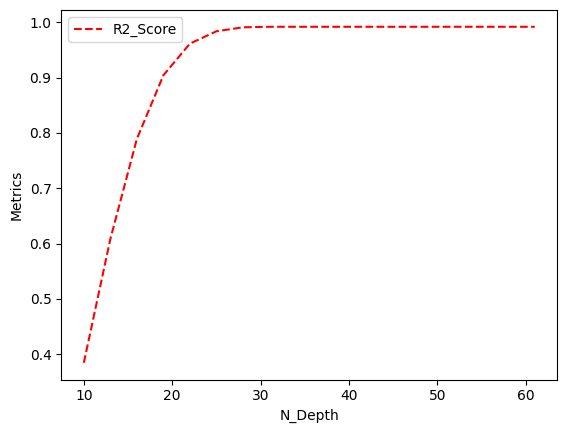

In [7]:
plt.plot(depth, r2_list,'r--', label = "R2_Score")
plt.xlabel("N_Depth")
plt.ylabel("Metrics")
plt.legend()

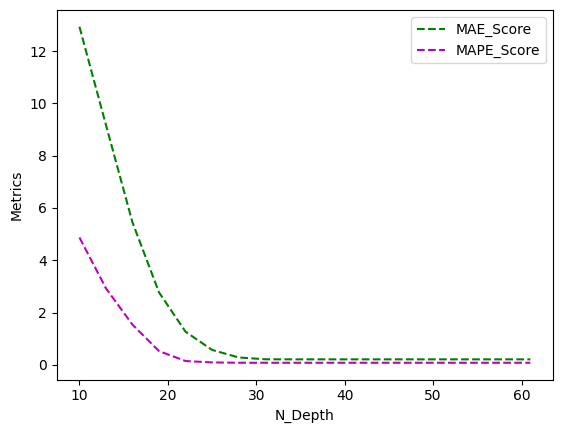

In [8]:
plt.plot(depth, mae_list,'g--', label = "MAE_Score")
plt.plot(depth, mape_list,'m--', label = "MAPE_Score")
plt.xlabel("N_Depth")
plt.ylabel("Metrics")
plt.legend()

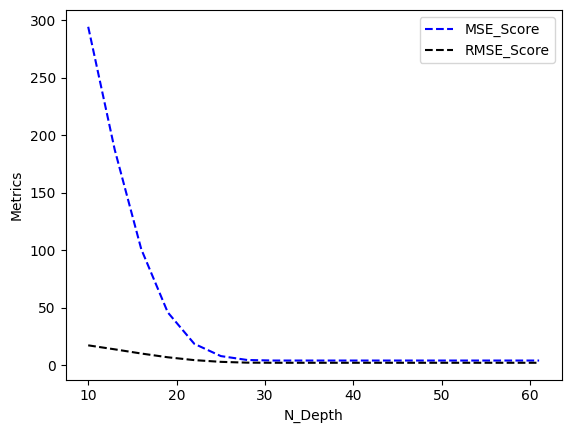

In [9]:
plt.plot(depth, mse_list,'b--', label = "MSE_Score")
plt.plot(depth, rmse_list,'k--', label = "RMSE_Score")
plt.xlabel("N_Depth")
plt.ylabel("Metrics")
plt.legend()

### dados de treino e validação

In [10]:
depth = np.arange(10, 63, 3)
r2_list=[]
mse_list=[]
rmse_list=[]
mae_list=[]
mape_list=[]

for i in range(len(depth)):
    ypred_val = decision_tree_regressor(depth[i], x_train, y_train, x_val)
    r2_val = r2_score(y_val, ypred_val)
    mse_val = mse(y_val, ypred_val)
    rmse_val = rmse(y_val, ypred_val)
    mae_val = mae(y_val, ypred_val)
    mape_val = mape(y_val, ypred_val)
    r2_list, mse_list, rmse_list, mae_list, mape_list = metrics_list(r2_list, r2_val,
                                                                     mse_list, mse_val,
                                                                     rmse_list, rmse_val,
                                                                     mae_list, mae_val,
                                                                     mape_list, mape_val)

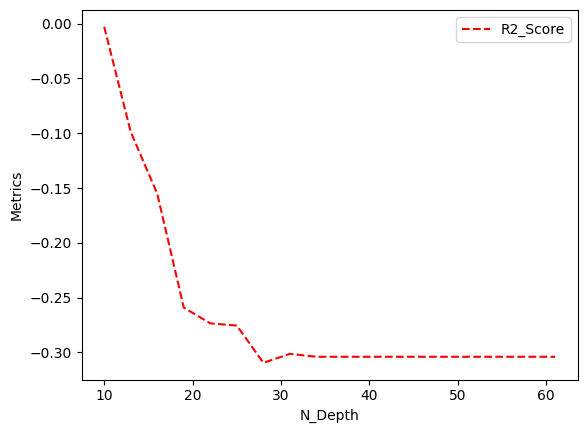

In [11]:
plt.plot(depth, r2_list,'r--', label = "R2_Score")
plt.xlabel("N_Depth")
plt.ylabel("Metrics")
plt.legend()

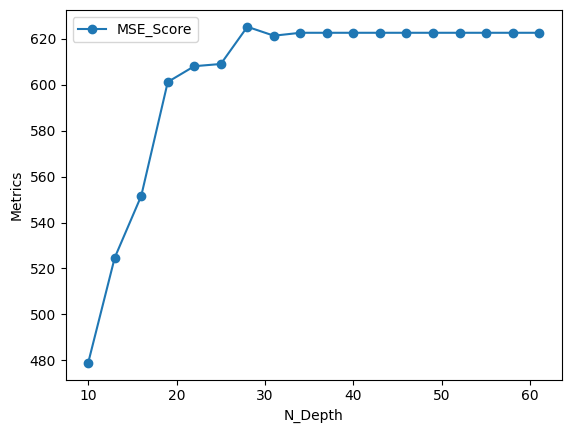

In [21]:
plt.plot(depth, mse_list,'o-', label = "MSE_Score")
plt.xlabel("N_Depth")
plt.ylabel("Metrics")
plt.legend()

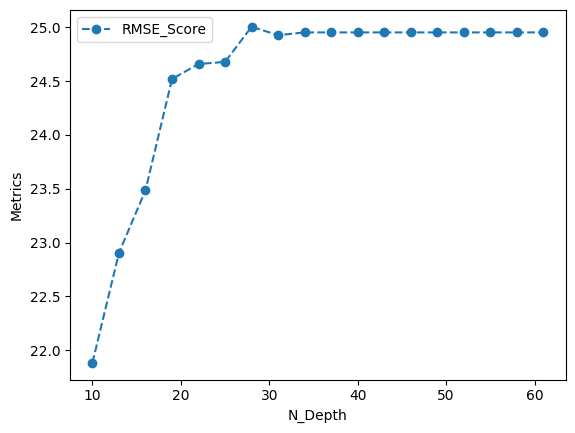

In [26]:
plt.plot(depth, rmse_list,'o--', label = "RMSE_Score")
plt.xlabel("N_Depth")
plt.ylabel("Metrics")
plt.legend()

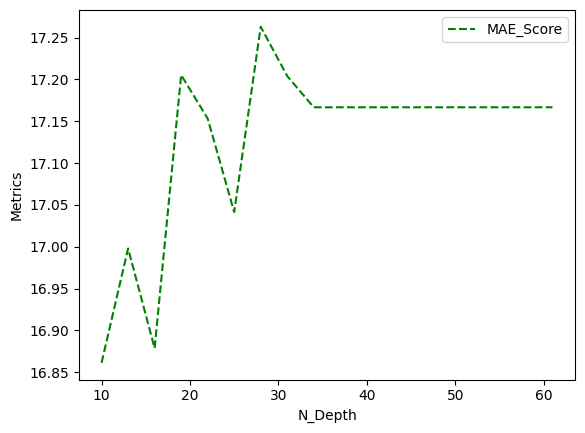

In [23]:
plt.plot(depth, mae_list,'g--', label = "MAE_Score")
plt.xlabel("N_Depth")
plt.ylabel("Metrics")
plt.legend()

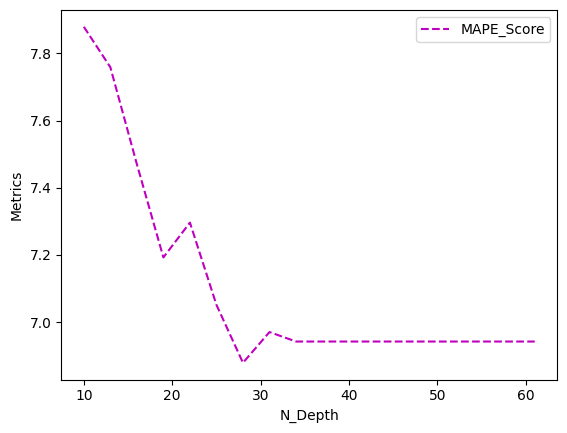

In [24]:
plt.plot(depth, mape_list,'m--', label = "MAPE_Score")
plt.xlabel("N_Depth")
plt.ylabel("Metrics")
plt.legend()

In [50]:
d_best = r2_list.index(min(r2_list))
depth[d_best]

28

### dados treino, validação e teste

In [51]:
depth=28
ypred_test = decision_tree_regressor(depth, pd.concat([x_train, x_val]), pd.concat([y_train, y_val]), x_test)


In [52]:
r2_test = r2_score(y_test, ypred_test)
mse_test = mse(y_test, ypred_test)
rmse_test = rmse(y_test, ypred_test)
mae_test = mae(y_test, ypred_test)
mape_test = mape(y_test, ypred_test)

### tabela final

In [53]:
depth=28
ypred_train = decision_tree_regressor(depth, x_train, y_train, x_train)
r2_train = r2_score(y_train, ypred_train)
mse_train = mse(y_train, ypred_train)
rmse_train = rmse(y_train, ypred_train)
mae_train = mae(y_train, ypred_train)
mape_train = mape(y_train, ypred_train)

In [54]:
depth=28
ypred_val = decision_tree_regressor(depth, x_train, y_train, x_val)
r2_val = r2_score(y_val, ypred_val)
mse_val = mse(y_val, ypred_val)
rmse_val = rmse(y_val, ypred_val)
mae_val = mae(y_val, ypred_val)
mape_val = mape(y_val, ypred_val)

In [57]:
df_dtr = tabela("Decision_Tree_Regressor", '-','-','max_depth', 28, r2_train, r2_val, r2_test,
                mse_train, mse_val, mse_test, rmse_train, rmse_val, rmse_test, mae_train, mae_val, mae_test,
                mape_train, mape_val, mape_test)

df_dtr

,Decision_Tree_Regressor,-,max_depth,R2_Score,MSE,RMSE,MAE,MAPE
0,dataset train,-,28,0.990791,4.402052,2.098107,0.286160,0.084054
1,dataset validation,-,28,-0.309388,625.248181,25.004963,17.262808,6.878538
2,dataset test,-,28,-0.170129,569.737119,23.869167,15.790974,5.989356


In [47]:
mse_

644.2814123629663